<a href="https://colab.research.google.com/github/IvanovMaxim2000/ML_3_sem/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание 1
Необходимо, используя перспективное преобразование, развернуть дорогу таким образом, чтобы она была непосредственно перед нами.

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

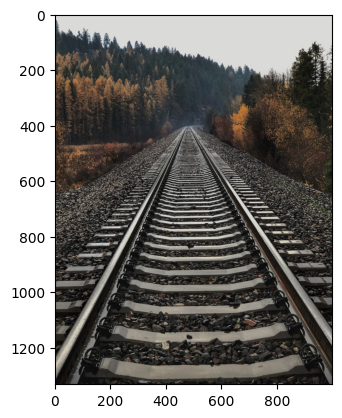

In [ ]:
img = cv.imread('railway.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

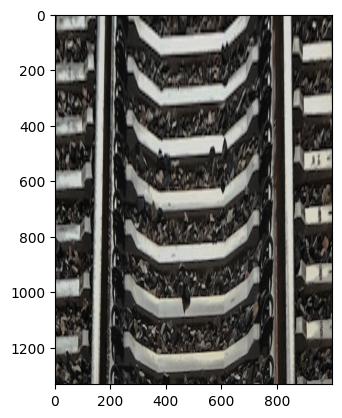

In [ ]:
height, width = img.shape[:2]

new_points = [[220, 700],
              [775, 700],
              [80, 900],
              [950, 900]]

old_points = [[0, 0],
        [width, 0],
        [0, height],
        [width, height]]

M = cv.getPerspectiveTransform(np.float32(new_points), np.float32(old_points))
img_res = cv.warpPerspective(img, M, (width, height))
plt.imshow(img_res)

## Задание 2
Используя классические аффинные преобразования, необходимо создать "тень" для этой пальмы и отрисовать ее с ней на одном рисунке. Пример результата находится в изображении palm_result.png

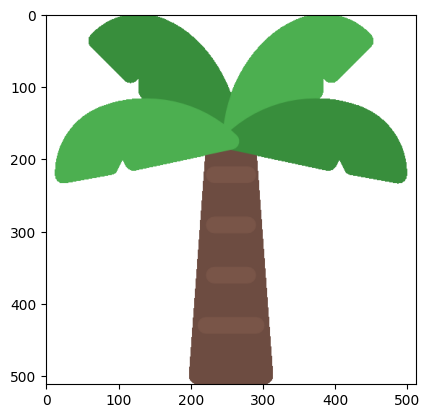

In [ ]:
img = cv.imread('palm.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

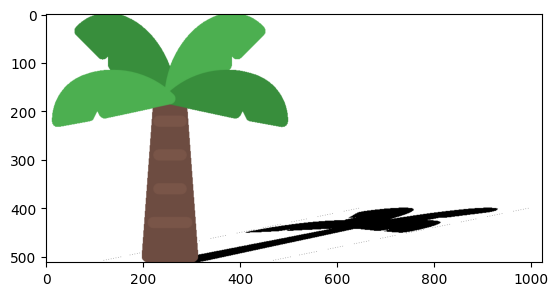

In [ ]:
height, width = img.shape[:2]

pts1 = [[0, 0],
        [height, 0],
        [0, width]]

pts2 = [[650, 400],
        [1000, 400],
        [100, 512]]

M = cv.getAffineTransform(np.float32(pts1), np.float32(pts2))
img_res = cv.warpAffine(img, M, (width*2, height))

img_res[img_res == 0] = 255
img_res[img_res != 255] = 0

iter_image = np.nditer(img, flags=['multi_index'])

while not iter_image.finished:
    x,y,_ = iter_image.multi_index
    pixel = iter_image[0]

    if (pixel != 255):
      img_res[x,y] = img[x,y]

    iter_image.iternext()

plt.imshow(img_res)